# Otsu's Algorithm
Otsu's Algorithm is a thresholding technique to separat foreground from background. Foreground is assigned values of 255 while background is assigned values of 1

In [1]:
# Importing libraries 
import cv2
import numpy as np
import matplotlib.pyplot as plt

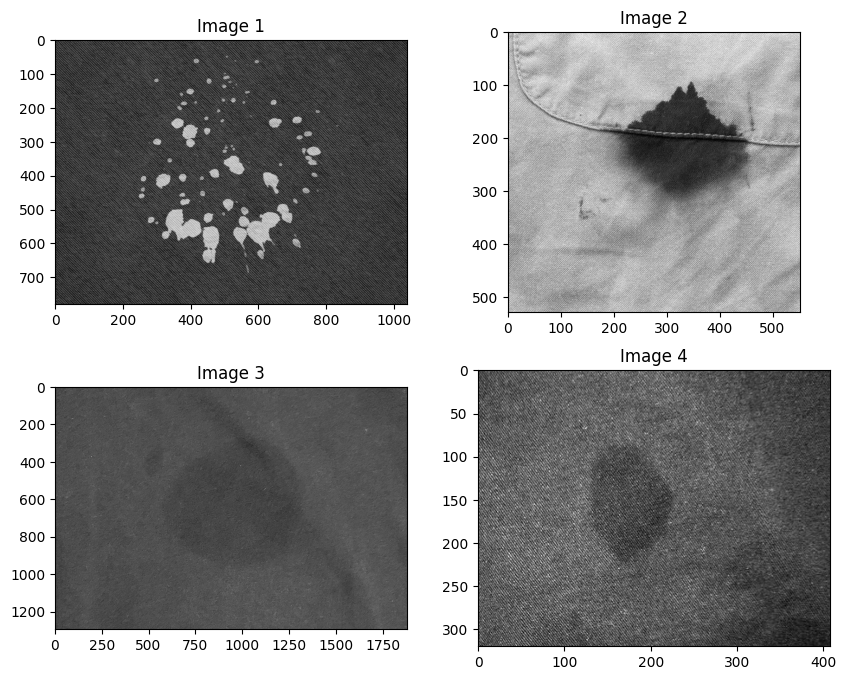

In [2]:
# Preprocessing for Images

# Load the images using OpenCV
image = cv2.imread('img/stained1.jpeg')
image2 = cv2.imread('img/stained3copy.jpeg')
image3 = cv2.imread('img/stained4.jpeg')
image4 = cv2.imread('img/black.jpeg')


# Convert the images to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
gray_image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
gray_image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)

# Plot images
plt.figure(figsize=(10, 8))

# Plot image 1
plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Image 1')

# Plot image 2
plt.subplot(2, 2, 2)
plt.imshow(gray_image2, cmap='gray')
plt.title('Image 2')

# Plot image 3
plt.subplot(2, 2, 3)
plt.imshow(gray_image3, cmap='gray')
plt.title('Image 3')

# Plot image 4
plt.subplot(2, 2, 4)
plt.imshow(gray_image4, cmap='gray')
plt.title('Image 4')

plt.show()


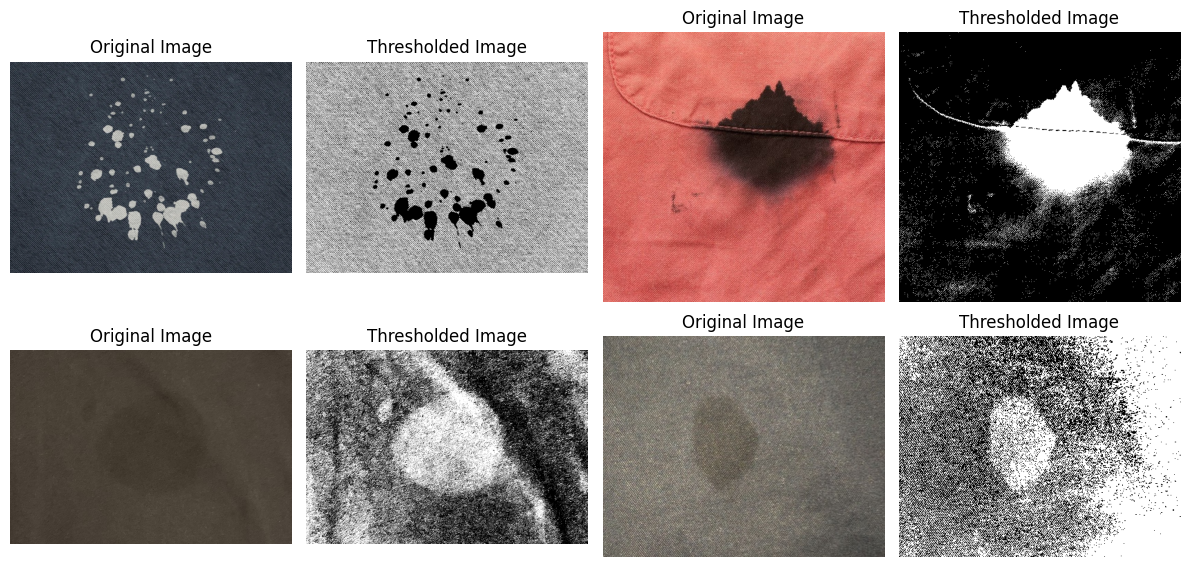

In [4]:
# Apply Otsu's thresholding
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, binary_image2 = cv2.threshold(gray_image2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, binary_image3 = cv2.threshold(gray_image3, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, binary_image4 = cv2.threshold(gray_image4, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Define a list of tuples containing original images and their corresponding binary images
image_pairs = [(image, binary_image), (image2, binary_image2), (image3, binary_image3), (image4, binary_image4)]

# Plot original and thresholded images
fig, axes = plt.subplots(2, 4, figsize=(12, 6))        

for i, (original, binary) in enumerate(image_pairs):
    row = i // 2
    col = i % 2 * 2
    axes[row, col].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[row, col].set_title('Original Image')
    axes[row, col].axis('off')
    axes[row, col+1].imshow(binary, cmap='binary')
    axes[row, col+1].set_title('Thresholded Image')
    axes[row, col+1].axis('off')

plt.tight_layout()
plt.show()

In [18]:
#Stain Detection
array = [binary_image, binary_image2, binary_image3, binary_image4]
for i in range(0, len(array)):
    rows, cols = array[i].shape
    stains = 0; 
    for j in range(0,rows): 
        for k in range(0,cols): 
            if (array[i][j,k] == 0):
                stains = 1 
                break
    if (stains == 1):
        print("Stains Detected in binary_image",i )
    else: 
        print("No Stains detected in binary_image", i)
        

Stains Detected in binary_image 0
Stains Detected in binary_image 1
Stains Detected in binary_image 2
Stains Detected in binary_image 3


## Conclusion 
Stain detection via Otsu's algorithm only works on plain textiles and proves to be inefficient in patterned textiles. Please note that second image appears invisible but that's only becasue it is white.

# kNN Classification - (Alternative Method)
kNN Classification works by....

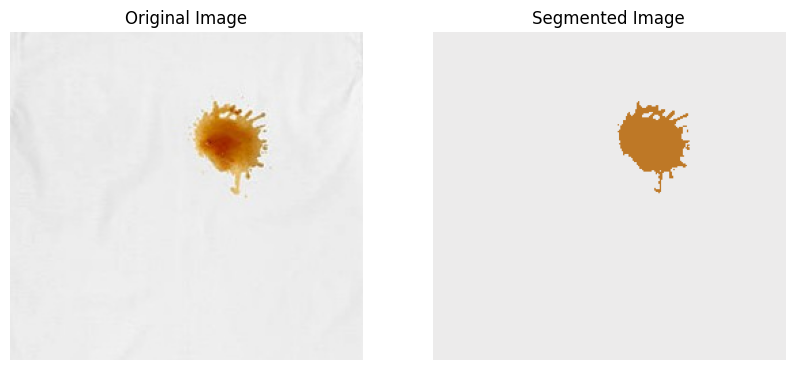

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image
image = cv2.imread('shirt_cropped.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Flatten the image array
pixels = image.reshape(-1, 3)

# Convert to float32
pixels = np.float32(pixels)

# Define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 2  # Number of clusters
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to 8 bit values
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# Reshape back to the original image shape
segmented_image = segmented_image.reshape(image.shape)

# Display the original image and the segmented image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.axis('off')

plt.show()

In [9]:
#segment positions
segment_positions = []

for i in range(k):
    # Find the indices of pixels belonging to the current cluster
    indices = np.where(labels == i)[0]
    
    # Extract the positions (coordinates) of these pixels
    positions = [(index % image.shape[1], index // image.shape[1]) for index in indices]
    
    # Append the positions to the list
    segment_positions.append(positions)

# Example usage:
for i, positions in enumerate(segment_positions):
    print(f"Segment {i+1} positions:")
    for pos in positions[:10]:  # Displaying only the first 10 positions for brevity
        print(pos)


Segment 1 positions:
(0, 0)
(1, 0)
(2, 0)
(3, 0)
(4, 0)
(5, 0)
(6, 0)
(7, 0)
(8, 0)
(9, 0)
Segment 2 positions:
(151, 51)
(150, 52)
(151, 52)
(150, 53)
(151, 53)
(150, 54)
(151, 54)
(152, 54)
(158, 54)
(159, 54)


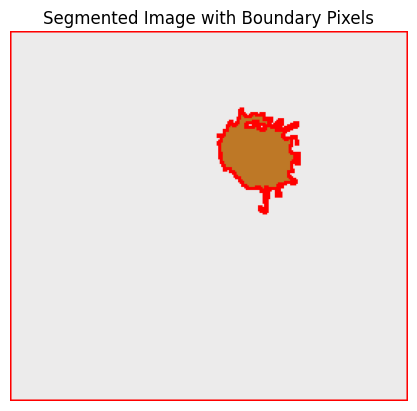

In [10]:
segmented_image_with_boundary = np.copy(segmented_image)

# Define the color for the boundary pixels
boundary_color = np.array([255, 0, 0], dtype=np.uint8)  # Red color

# Iterate over each segment
for positions in segment_positions:
    for x, y in positions:
        # Check if the current pixel is a boundary pixel
        is_boundary_pixel = False
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if (dx != 0 or dy != 0) and (x + dx, y + dy) not in positions:
                    is_boundary_pixel = True
                    break
            if is_boundary_pixel:
                break
        
        # If the current pixel is a boundary pixel, replace it with the boundary color
        if is_boundary_pixel:
            segmented_image_with_boundary[y, x] = boundary_color

# Display the segmented image with boundary pixels
plt.imshow(segmented_image_with_boundary)
plt.title('Segmented Image with Boundary Pixels')
plt.axis('off')
plt.show()
